In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.nn import Embedding
from torch.autograd import Variable

In [2]:
np_data = np.arange(4).reshape((2, 2))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()

print(tensor2array)
print(torch_data)

[[0 1]
 [2 3]]
tensor([[0, 1],
        [2, 3]], dtype=torch.int32)


In [3]:
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)  

In [4]:
torch_data*tensor

tensor([[ 0.,  2.],
        [ 6., 12.]])

In [5]:
print(torch_data)
print(torch_data[:, :1])

tensor([[0, 1],
        [2, 3]], dtype=torch.int32)
tensor([[0],
        [2]], dtype=torch.int32)


In [7]:
tensor = torch.FloatTensor([1])
variable = Variable(tensor, requires_grad=True)

t_out = tensor*tensor       # x^2
v_out_1 = variable*variable   # x^2
v_out_2 = torch.mean(variable*10)

print(t_out)
print(v_out_1)    # 7.5
print(v_out_2)

tensor([1.])
tensor([1.], grad_fn=<MulBackward0>)
tensor(10., grad_fn=<MeanBackward0>)


In [9]:
print(variable)
v_out_1.backward(retain_graph=True)
v_out_2.backward(retain_graph=True)
print(variable.grad)

tensor([1.], requires_grad=True)
tensor([24.])


In [20]:
x = torch.linspace(-5, 5, 200)
len(x)

200

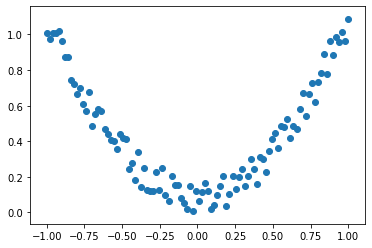

In [39]:
# x =  torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # x data (tensor), shape=(100, 1)
x = torch.linspace(-1, 1, 100).reshape((-1, 1))
y = x.pow(2) + 0.2*torch.rand(x.size()) # noisy y data (tensor), shape=(100, 1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [2]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

In [3]:
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [4]:
net.hidden.weight

Parameter containing:
tensor([[ 0.0268],
        [ 0.8031],
        [-0.6669],
        [ 0.7685],
        [ 0.1194],
        [-0.4628],
        [-0.7025],
        [ 0.7378],
        [ 0.6832],
        [ 0.7978]], requires_grad=True)

In [42]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss() 

In [43]:
list(net.named_parameters())

[('hidden.weight',
  Parameter containing:
  tensor([[ 0.4807],
          [ 0.8598],
          [-0.5950],
          [-0.1324],
          [ 0.7191],
          [-0.3991],
          [ 0.7390],
          [-0.8981],
          [ 0.9089],
          [-0.3648]], requires_grad=True)),
 ('hidden.bias',
  Parameter containing:
  tensor([ 0.0243, -0.2009, -0.2499, -0.6031,  0.7855,  0.1039,  0.6327, -0.0581,
           0.7816, -0.7772], requires_grad=True)),
 ('predict.weight',
  Parameter containing:
  tensor([[ 0.1544, -0.0161, -0.0088,  0.2640,  0.1986, -0.1937,  0.0359,  0.0062,
           -0.0177,  0.0789]], requires_grad=True)),
 ('predict.bias',
  Parameter containing:
  tensor([-0.1291], requires_grad=True))]

In [44]:
for t in range(100):
    prediction = net(x)

    loss = loss_func(prediction, y)

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()

In [34]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3, 1), stride=1, bias=False)

    def forward(self, x):
        x = self.hidden(x)
        return x.view(x.size(0), -1)

In [35]:
net = Net()

In [36]:
x = np.array([
    [[
        [1., 2., 3],
        [1., 2., 3],
        [1., 2., 3]
    ]],
    [[
        [1., 2., 1],
        [3., 2., 3],
        [1., 2., 1]
    ]],
])
x = torch.FloatTensor(x)

In [43]:
y = net(x)

In [44]:
y

tensor([[1.3075, 2.6149, 3.9224],
        [2.1447, 2.6149, 2.1447]], grad_fn=<ViewBackward>)